In [130]:
import networkx as nx
import seaborn as sns
import numpy as np
from numpy import inf

In [131]:
from os.path import join, abspath, dirname

path = join('.', '..', 'tests/out/graph.gexf')
G = nx.read_gexf(path)

nodelist = list(G.nodes())
matrix = np.array(nx.floyd_warshall_numpy(G, nodelist=nodelist, weight='weight'))
matrix

array([[   0.,  108.,  108., ...,  467.,  285.,  235.],
       [1886.,    0., 1894., ..., 2018., 1836., 1786.],
       [ 227.,  235.,    0., ...,  359.,  177.,  127.],
       ...,
       [1022.,  795.,  795., ...,    0.,  972.,  922.],
       [  50.,  158.,  158., ...,  517.,    0.,  285.],
       [ 335.,  108.,  108., ...,  467.,  285.,    0.]])

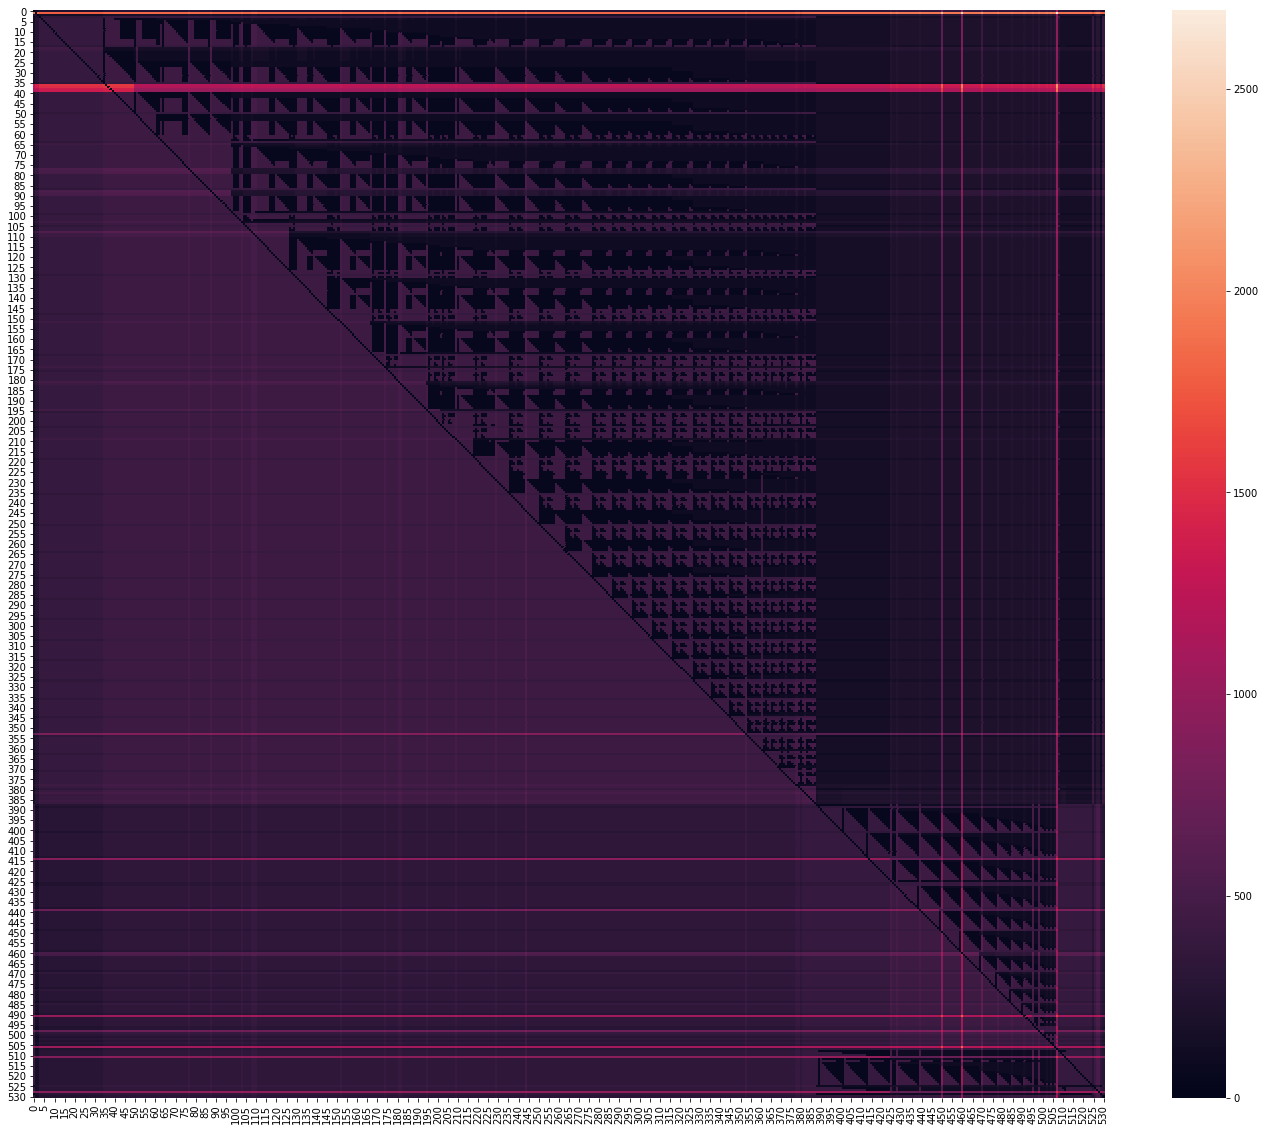

In [132]:
import pylab as plt

plot_matrix = matrix.copy()
plot_matrix[plot_matrix == inf] = 10000
plot_matrix = np.nan_to_num(plot_matrix)

fig = plt.figure(figsize=(24,20))
ax = fig.gca()
step = 1
sns.heatmap(plot_matrix[::step, ::step], ax=ax)

In [133]:
import numpy as np

cycles = []
paths = []
for i, _ in enumerate(matrix):
    for j, _ in enumerate(matrix[i]):
        a = matrix[i, j]
        b = matrix[j, i]
        if i == j:
            continue

        anode = nodelist[i]
        bnode = nodelist[j]
        if a != np.inf:
            paths.append((anode, bnode, a))
        if b != np.inf:
            paths.append((bnode, anode, b))
        if a != np.inf and b != np.inf:
            cycles.append((anode, bnode, a, b, a + b))


cycles = sorted(cycles, key=lambda c: c[-1])
print("Cycles: {}".format(len(cycles)))
print("Paths: {}".format(len(paths)))

Cycles: 281430
Paths: 562860


In [134]:
for c in cycles[:10]:
    print(c)

("(4227, 5920, 1, 'PCR_PRODUCT')", "(5947, 4219, 1, 'PCR_PRODUCT')", 127.0, 108.0, 235.0)
("(5947, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 108.0, 127.0, 235.0)
("(0, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 108.0, 227.0, 335.0)
("(0, 4219, 1, 'PCR_PRODUCT')", "(5947, 9408, 1, 'PCR_PRODUCT')", 235.0, 100.0, 335.0)
("(0, 4219, 1, 'PCR_PRODUCT')", "(5947, 0, 1, 'PCR_PRODUCT')", 235.0, 100.0, 335.0)
("(0, 4219, 1, 'PCR_PRODUCT')", "(9407, 137, 1, 'PCR_PRODUCT')", 285.0, 50.0, 335.0)
("(4227, 5920, 1, 'PCR_PRODUCT')", "(0, 4219, 1, 'PCR_PRODUCT')", 227.0, 108.0, 335.0)
("(4227, 5920, 1, 'PCR_PRODUCT')", "(5947, 9408, 1, 'PCR_PRODUCT')", 127.0, 208.0, 335.0)
("(4227, 5920, 1, 'PCR_PRODUCT')", "(28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 227.0, 108.0, 335.0)
("(4227, 5920, 1, 'PCR_PRODUCT')", "(128, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 227.0, 108.0, 335.0)


In [137]:
nx.shortest_path(G, cycles[3][1], cycles[3][0])

["(5947, 9408, 1, 'PCR_PRODUCT')",
 "(4227, 4261, 1, 'PCR_PRODUCT')",
 "(0, 4219, 1, 'PCR_PRODUCT')"]

In [ ]:
nx.shortest_path_length

In [154]:
from more_itertools import pairwise

for c in cycles[:5]:
    print(c)
    path1 = nx.shortest_path(G, c[0], c[1], weight='weight')
    path2 = nx.shortest_path(G, c[1], c[0], weight='weight')
    path = path1 + path2[1:]
    for n1, n2 in pairwise(path):
        edata = G[n1][n2]
        print('{} {} {} > {}'.format(edata['weight'], edata['name'], n1, n2))
    print()

("(4227, 5920, 1, 'PCR_PRODUCT')", "(5947, 4219, 1, 'PCR_PRODUCT')", 127.0, 108.0, 235.0)
127.0 synthesis (4227, 5920, 1, 'PCR_PRODUCT') > (5947, 4219, 1, 'PCR_PRODUCT')
108.0 synthesis (5947, 4219, 1, 'PCR_PRODUCT') > (4227, 5920, 1, 'PCR_PRODUCT')

("(5947, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 108.0, 127.0, 235.0)
108.0 synthesis (5947, 4219, 1, 'PCR_PRODUCT') > (4227, 5920, 1, 'PCR_PRODUCT')
127.0 synthesis (4227, 5920, 1, 'PCR_PRODUCT') > (5947, 4219, 1, 'PCR_PRODUCT')

("(0, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 108.0, 227.0, 335.0)
108.0 synthesis (0, 4219, 1, 'PCR_PRODUCT') > (4227, 5920, 1, 'PCR_PRODUCT')
127.0 synthesis (4227, 5920, 1, 'PCR_PRODUCT') > (5947, 0, 1, 'PCR_PRODUCT')
100.0 synthesis (5947, 0, 1, 'PCR_PRODUCT') > (0, 4219, 1, 'PCR_PRODUCT')

("(0, 4219, 1, 'PCR_PRODUCT')", "(5947, 9408, 1, 'PCR_PRODUCT')", 235.0, 100.0, 335.0)
108.0 synthesis (0, 4219, 1, 'PCR_PRODUCT') > (4227, 5920, 1, 'PCR_PRODUCT')
127.0 synthesis (4

from more_itertools import pairwise

for c in cycles[:10]:
    path1 = nx.shortest_path(G, c[0], c[1])
    path2 = nx.shortest_path(G, c[1], c[0])
    path = path1 + path2[1:]
    for n1, n2 in pairwise(path):
        print(n1)
        print(n2)
        print(G[n1][n2])
    print()

In [40]:
from itertools import product

list(product([1,2,3,4], repeat=2))

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]